<a href="https://colab.research.google.com/github/betulkabadayi/Aygaz_AI_Bootcamp_Proje/blob/main/Aygaz_AI_Bootcamp_Proje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install catboost
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import xgboost as xgb

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier, Pool


from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,auc

import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.7 MB/s eta 0:00:00


**1. Veri Seti Seçimi**

In [2]:
f_mnist=tf.keras.datasets.fashion_mnist

#veri setini yükleme
(X_train,y_train),(X_test,y_test) = f_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


**2. Veri Ön İşleme**

In [3]:
# X_train, X_test, y_train ve y_test olarak bölünmüş verilerin boyutlarını yazdırma

print("EĞİTİM VERİSİ:",X_train.shape,y_train.shape)

print("TEST VERİSİ:",X_test.shape,y_test.shape)


#Veri seti içindeki görüntülerin boyutlarını yazdırınız.

print("EĞİTİM VERİSİ GÖRÜNTÜ BOYUTLARI:",X_train.shape[1:])

print("TEST VERİSİ GÖRÜNTÜ BOYUTLARI:",X_test.shape[1:])


EĞİTİM VERİSİ: (60000, 28, 28) (60000,)
TEST VERİSİ: (10000, 28, 28) (10000,)
EĞİTİM VERİSİ GÖRÜNTÜ BOYUTLARI: (28, 28)
TEST VERİSİ GÖRÜNTÜ BOYUTLARI: (28, 28)


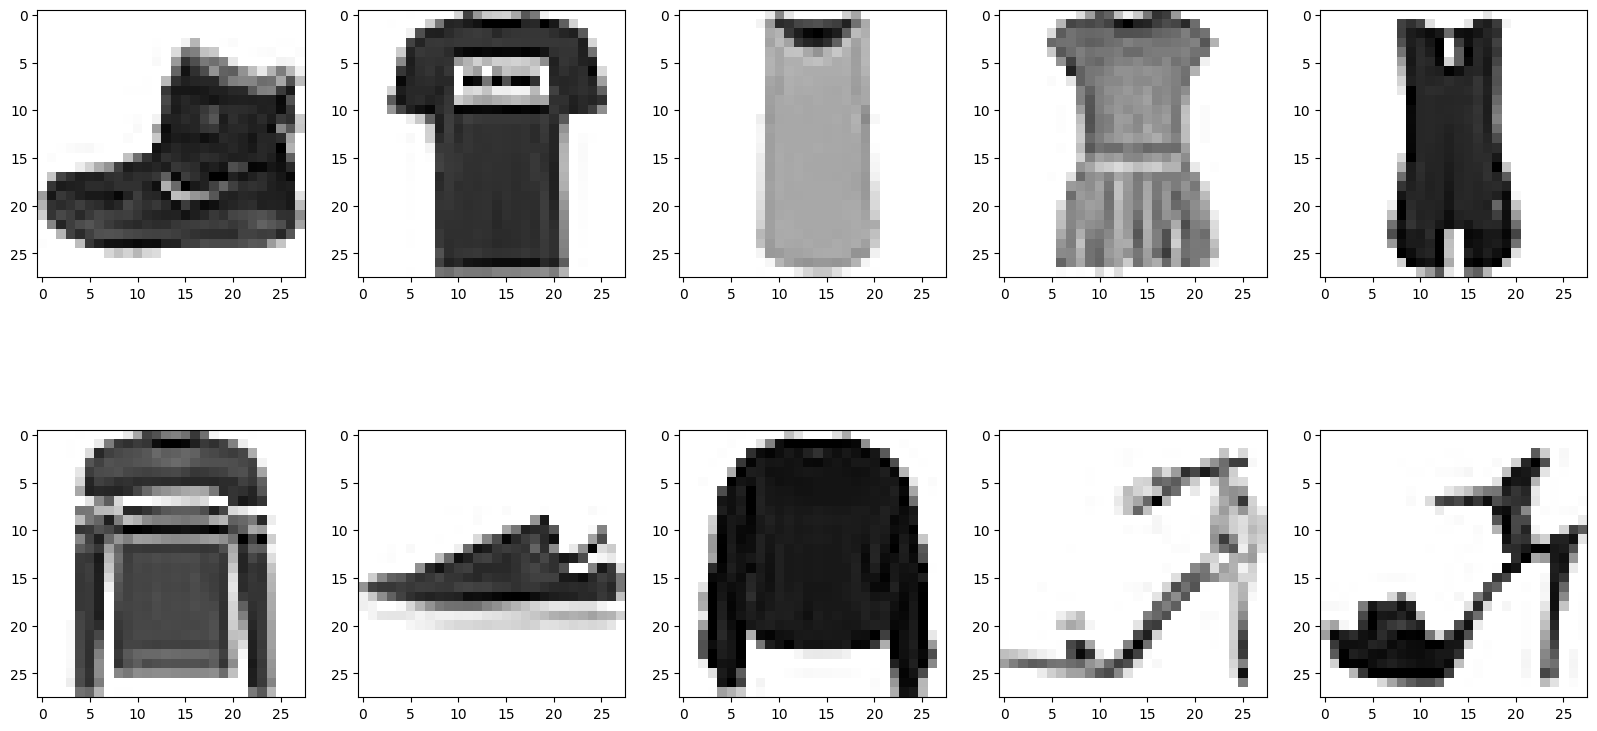

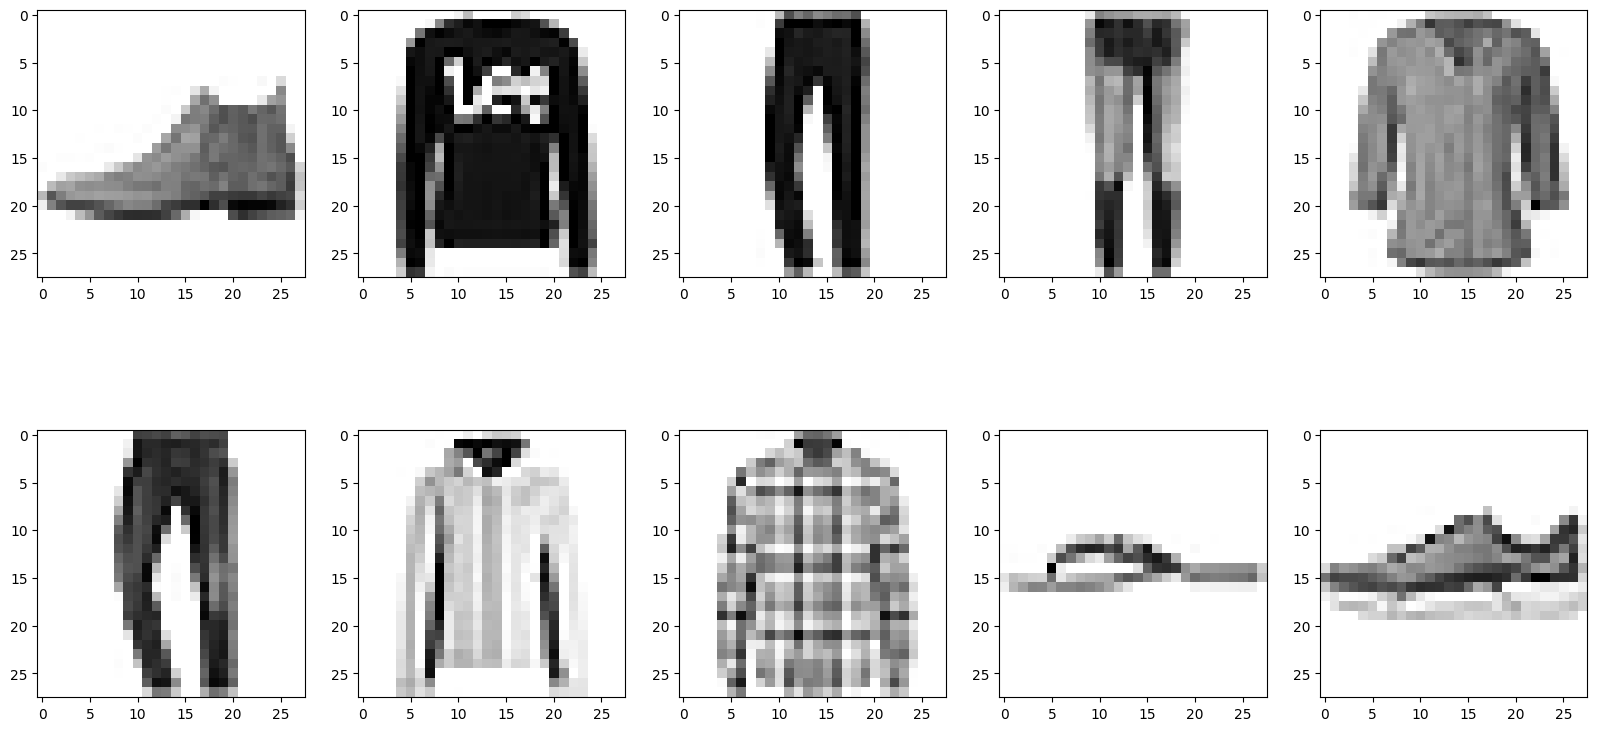

In [ ]:
#Veri seti içindeki görüntüleri görselleştiriniz (Ör: 10 görüntüyü görselleştiriniz).



plt.figure(figsize=(20,10))

for i in range(10):
    plt.subplot(2,5,i+1)
    #plt.xticks([])
    #plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    #plt.xticks([])
    #plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
plt.show()



In [ ]:
#Veri normalleştirme

X_train = X_train / 255.0

X_test = X_test / 255.0

3. MAKİNE ÖĞRENMESİ ALGORİTMALARI MODEL EĞİTİMİ

In [ ]:
#KNN Modeli

# Veri setini düzleştirme (28x28 piksel olan görüntüleri 784 özellikli 1D vektöre dönüştürme)
x_train_flat = X_train.reshape(X_train.shape[0], -1)
x_test_flat = X_test.reshape(X_test.shape[0], -1)

knn_model = KNeighborsClassifier()

#modeli eğitme
knn_fitted=knn_model.fit(x_train_flat,y_train)

#test verileri üzerinden tahmin yapma

y_pred = knn_fitted.predict(x_test_flat)

# değerlendirme metrikleri hesabı ve doğruluk hesaplama

accuracy= accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

print(f'Doğruluk (Accuracy): {accuracy:.4f}')
print(f'F1 Skoru: {f1:.4f}')
print(f'Geri Çağırma (Recall): {recall:.4f}')
print(f'Kesinlik (Precision): {precision:.4f}')

Doğruluk (Accuracy): 0.8554
F1 Skoru: 0.8546
Geri Çağırma (Recall): 0.8554
Kesinlik (Precision): 0.8578


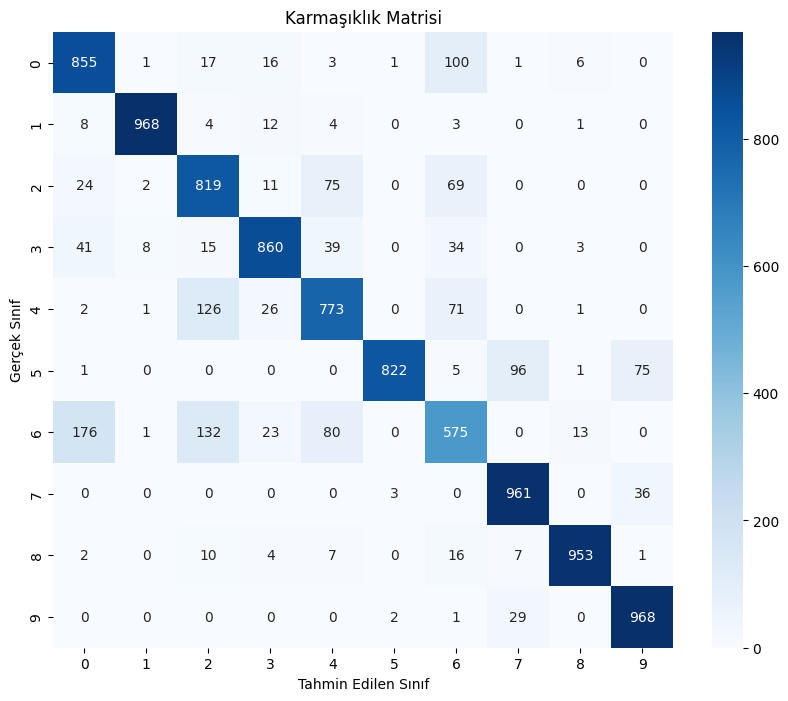

In [ ]:
# Karmaşıklık matrisi görselleştirme

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

In [ ]:
#Logistic Regresyon Modeli

# Veri setini düzleştirme (28x28 piksel olan görüntüleri 784 özellikli 1D vektöre dönüştürme)
x_train_flat = X_train.reshape((X_train.shape[0], -1))
x_test_flat = X_test.reshape((X_test.shape[0], -1))

# Logistic Regresyon modelini tanımlama
log_reg = LogisticRegression(max_iter=100)

# Modeli eğitme
logreg_fitted = log_reg.fit(x_train_flat, y_train)

#test verileri üzerinden tahmin yapma
y_test_pred = logreg_fitted.predict(x_test_flat)

# Test doğruluğunu hesaplama ve değerlendirme metrikleri hesabı
accuracy_logreg = accuracy_score(y_test,y_test_pred )
f1_logreg=f1_score(y_test,y_test_pred, average='weighted')
recall_logreg=recall_score(y_test,y_test_pred, average='weighted')
precision_logreg=precision_score(y_test,y_test_pred, average='weighted')

print(f'Doğruluk (Accuracy): {accuracy_logreg:.4f}')
print(f'F1 Skoru: {f1_logreg:.4f}')
print(f'Geri Çağırma (Recall): {recall_logreg:.4f}')
print(f'Kesinlik (Precision): {precision_logreg:.4f}')


Doğruluk (Accuracy): 0.8439
F1 Skoru: 0.8431
Geri Çağırma (Recall): 0.8439
Kesinlik (Precision): 0.8428


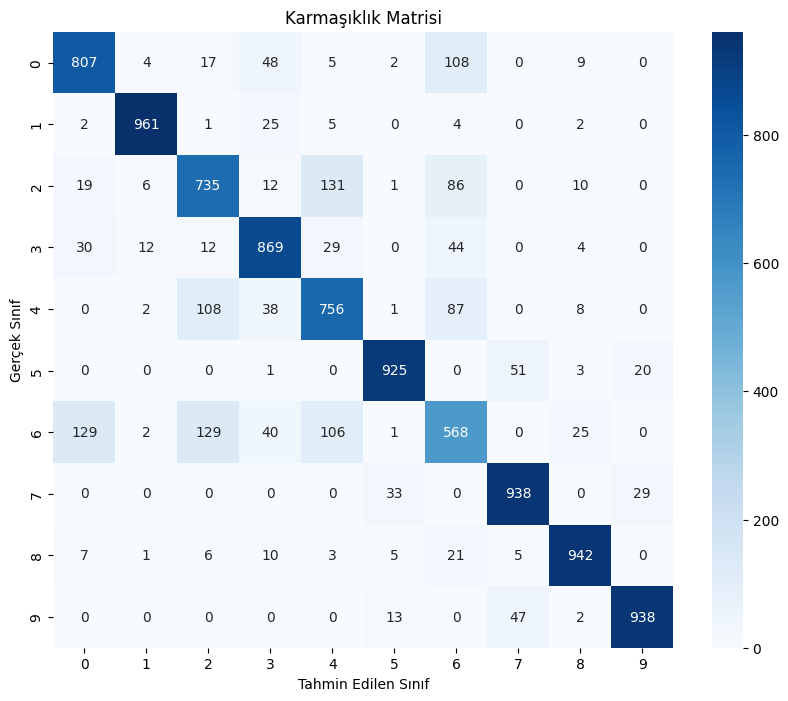

In [ ]:
# Karmaşıklık matrisi görselleştirme

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

In [ ]:
#Catboost Modeli

# Veri setini düzleştirme (28x28 piksel olan görüntüleri 784 özellikli 1D vektöre dönüştürme)
x_train_flat = X_train.reshape((X_train.shape[0], -1))
x_test_flat = X_test.reshape((X_test.shape[0], -1))

# Catboost modelini tanımlama ve eğitme
catboost_model =CatBoostClassifier(iterations=50, learning_rate=0.5, depth=6, loss_function='MultiClass', random_state=32)

# CatBoost için veri yapılarını oluşturma
train_pool = Pool(x_train_flat, label=y_train)
test_pool = Pool(x_test_flat, label=y_test)

# Modeli eğitme
catboost_model.fit(train_pool, eval_set=test_pool)

# Test veri seti üzerinde tahmin yapma
y_pred = catboost_model.predict(x_test_flat)

# Test doğruluğunu hesaplama ve değerlendirme metrikleri hesabı
accuracy_cb = catboost_model.score(x_test_flat, y_pred)
f1_cb=f1_score(y_test,y_pred, average='weighted')
recall_cb=recall_score(y_test,y_pred, average='weighted')
precision_cb=precision_score(y_test,y_pred, average='weighted')

print(f'Doğruluk (Accuracy): {accuracy_cb:.4f}')
print(f'F1 Skoru: {f1_cb:.4f}')
print(f'Geri Çağırma (Recall): {recall_cb:.4f}')
print(f'Kesinlik (Precision): {precision_cb:.4f}')

0:	learn: 1.1304658	test: 1.1450732	best: 1.1450732 (0)	total: 11.5s	remaining: 9m 21s
1:	learn: 0.9016424	test: 0.9186278	best: 0.9186278 (1)	total: 18.9s	remaining: 7m 33s
2:	learn: 0.7756072	test: 0.7924181	best: 0.7924181 (2)	total: 28.2s	remaining: 7m 21s
3:	learn: 0.6991644	test: 0.7192011	best: 0.7192011 (3)	total: 36.9s	remaining: 7m 4s
4:	learn: 0.6375755	test: 0.6599656	best: 0.6599656 (4)	total: 45s	remaining: 6m 44s
5:	learn: 0.6042058	test: 0.6302088	best: 0.6302088 (5)	total: 54.3s	remaining: 6m 38s
6:	learn: 0.5722467	test: 0.5990445	best: 0.5990445 (6)	total: 1m 1s	remaining: 6m 19s
7:	learn: 0.5482929	test: 0.5771442	best: 0.5771442 (7)	total: 1m 11s	remaining: 6m 13s
8:	learn: 0.5367034	test: 0.5673002	best: 0.5673002 (8)	total: 1m 18s	remaining: 5m 59s
9:	learn: 0.5207096	test: 0.5508554	best: 0.5508554 (9)	total: 1m 27s	remaining: 5m 49s
10:	learn: 0.5098120	test: 0.5419418	best: 0.5419418 (10)	total: 1m 36s	remaining: 5m 42s
11:	learn: 0.5006047	test: 0.5337008	bes

In [11]:
#XGBoost Modeli

# Veri setini düzleştirme (28x28 piksel olan görüntüleri 784 özellikli 1D vektöre dönüştürme)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# XGBoost veri yapısına dönüştürme
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# XGBoost parametrelerini ayarlama
params = {
    'objective': 'multi:softmax',  # Çoklu sınıf sınıflandırma
    'num_class': 10,               # Fashion MNIST veri kümesinde 10 farklı sınıf
    'eval_metric': ['merror', 'mlogloss']  # Değerlendirme metrikleri
}

# Modeli eğitme
num_rounds = 50
model = xgb.train(params, dtrain, num_rounds)

# Test veri seti üzerinde tahmin yapma
preds = model.predict(dtest)

# Test doğruluğunu hesaplama ve değerlendirme metrikleri hesabı
accuracy_xg = accuracy_score(y_test, preds)
f1_xg = f1_score(y_test, preds, average='weighted')
recall_xg=recall_score(y_test,preds, average='weighted')
precision_xg = precision_score(y_test, preds, average='weighted')


Doğruluk (Accuracy): 0.8885
F1 Skoru: 0.8879
Geri Çağırma (Recall): 0.8885
Kesinlik (Precision): 0.8878


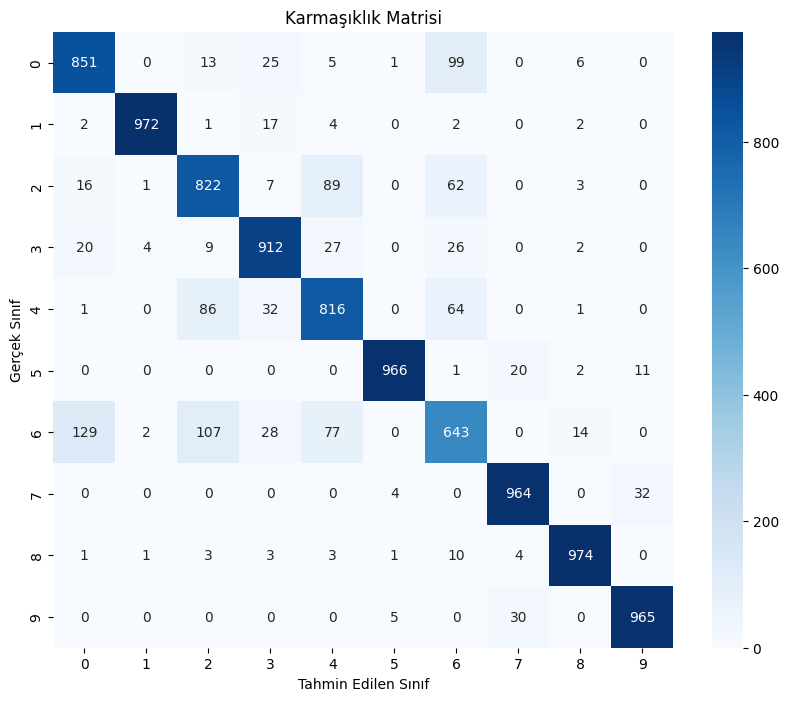

In [13]:
print(f'Doğruluk (Accuracy): {accuracy_xg:.4f}')
print(f'F1 Skoru: {f1_xg:.4f}')
print(f'Geri Çağırma (Recall): {recall_xg:.4f}')
print(f'Kesinlik (Precision): {precision_xg:.4f}')

# Karmaşıklık matrisi görselleştirme

cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()